## **1. Load Dataset**

In [1]:
import pandas as pd

# Load dataset
file_path = "master_data.csv"
df = pd.read_csv(file_path)
df.head()

,Item,System_Type,Round,Min,Sec,Sec/100,Total_Seconds_Per_Round,Defects for Round,Observed Total Count for Round,Accuracy for Round,...,Notes,Count 1,Count 2,Count 3,Count 4,Count 5,Count 6,Count 7,Count 8,Count 9
0,nail,human-in-the-loop,1,1,28,74,88.74,2,63,0.8514,...,at zoom out the model is confused between nail...,12,16.0,14.0,10.0,9.0,0.0,0.0,NaN,NaN
1,nail,human-in-the-loop,2,2,15,92,135.92,3,67,0.9054,...,at zoom out the model is confused between nail...,14,12.0,12.0,15.0,11.0,0.0,0.0,NaN,NaN
2,nail,human-in-the-loop,3,2,12,90,132.90,6,62,0.8378,...,at zoom out the model is confused between nail...,8,10.0,13.0,10.0,10.0,5.0,0.0,NaN,NaN
3,nail,human-in-the-loop,4,1,50,87,110.87,2,71,0.9595,...,at zoom out the model is confused between nail...,8,10.0,14.0,13.0,16.0,8.0,0.0,NaN,NaN
4,nail,human-in-the-loop,5,1,43,67,103.67,2,66,0.8919,...,at zoom out the model is confused between nail...,14,16.0,13.0,15.0,6.0,0.0,0.0,NaN,NaN


## **2. Exploratory Data Analysis**

In [2]:
# EDA
def eda(df):
    data_structure = df.info()
    num_rows = df.shape[0]
    num_cols = df.shape[1]
    duplicates = df.duplicated().sum()
    missing_values = df.isna().sum()
    
    print(f'Data structure: {data_structure}')
    print('--' * 20)
    print(f'Number of rows: {num_rows}')
    print('--' * 20)
    print(f'Number of columns: {num_cols}')
    print('--' * 20)
    print(f'Number of duplicates: {duplicates}')
    print('--' * 20)
    print(f'Number of missing values: {missing_values}')
    print('--' * 20)

eda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Item                            280 non-null    object 
 1   System_Type                     280 non-null    object 
 2   Round                           280 non-null    int64  
 3   Min                             280 non-null    int64  
 4   Sec                             280 non-null    int64  
 5   Sec/100                         280 non-null    int64  
 6   Total_Seconds_Per_Round         280 non-null    float64
 7   Defects for Round               280 non-null    int64  
 8   Observed Total Count for Round  280 non-null    int64  
 9   Accuracy for Round              280 non-null    float64
 10  GT_Number_of_Objects            280 non-null    float64
 11  GT_Number_of_Defects            280 non-null    float64
 12  GT_Grand_Total_Count            280 

<Axes: >

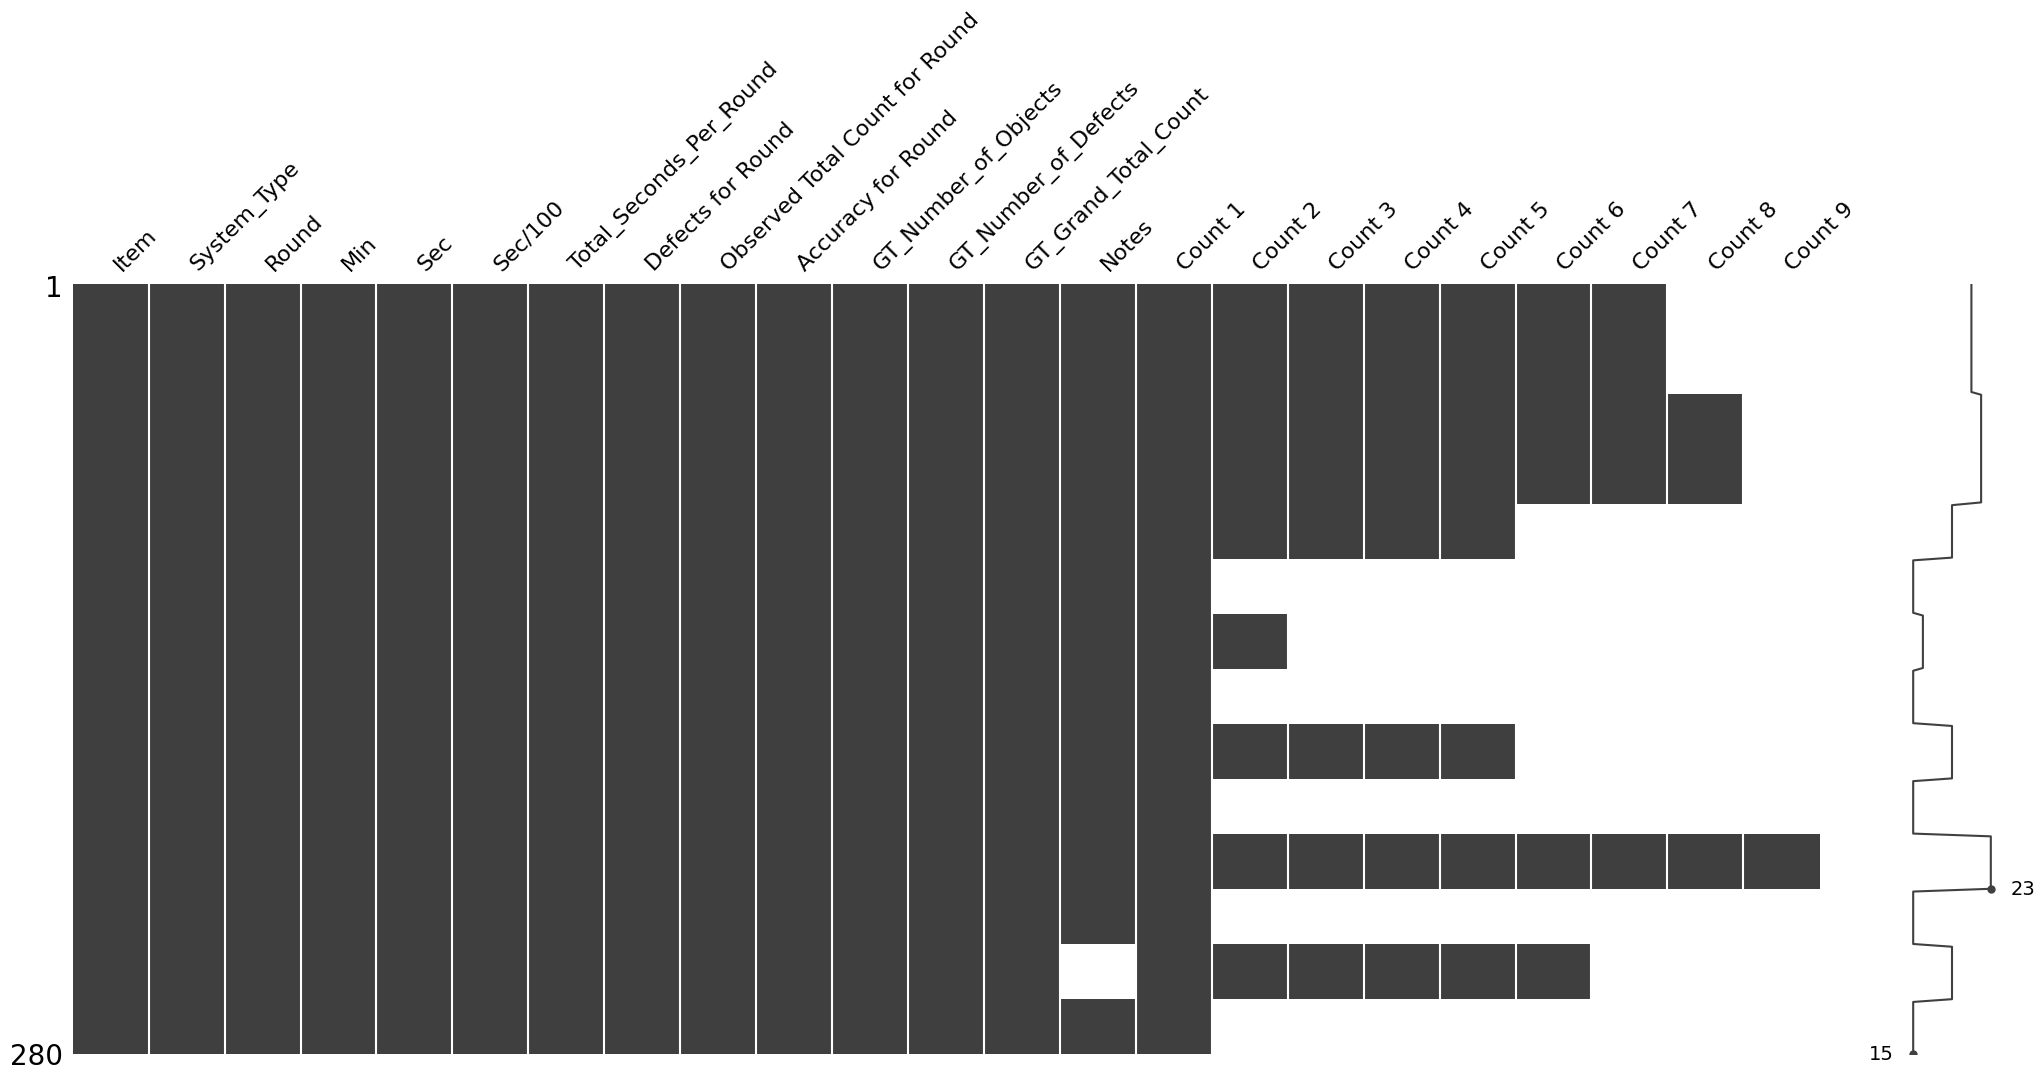

In [3]:
# Visualize missing values
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
msno.matrix(df)

In [4]:
# Check all unique values
def unique_values(df):
    for column_name in df.columns:
        print(f'Unique values in {column_name} column:')
        unique_values = df[column_name].unique()
        print(unique_values)
        print('--' * 20)
        
unique_values(df)

Unique values in Item column:
['nail' 'tek-screw' 'long screw' 'washer' 'nut' 'black' 'rivet']
----------------------------------------
Unique values in System_Type column:
['human-in-the-loop' 'human']
----------------------------------------
Unique values in Round column:
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
----------------------------------------
Unique values in Min column:
[1 2 3 0 5 4]
----------------------------------------
Unique values in Sec column:
[28 15 12 50 43 36 46 39 25 34 17  9 45 13  5 16  4 18 47 48 56  0 54 52
 59 53 27 10 44  8 37 20 38 24 42 35 57  7 22 32 30 19 14 49 58 55 26 51
 21 23 41 31 33  6  3  2 29 11 40  1]
----------------------------------------
Unique values in Sec/100 column:
[74 92 90 87 67 29 97 54 55 42 59 13 83 36  9 76 71 68  0 63 79 17  2 88
 73 60 40 12 48 45 96  6 82 95 52 35  8 11 51 56 34 50 78 91 65 75 94 81
 24 89 43 32 69 44 20 49 21 41 70 84 93 19 10 26 57 30 66 72 46 99 18 31
 61 98 86 64 38  1  5 14 80 85  

## **3. Descriptive Statistics**

In [5]:
from scipy import stats

summary_stats = df.groupby(['Item', 'System_Type']).agg(
    Mean_Time_Sec=('Total_Seconds_Per_Round', 'mean'),
    Std_Dev_Time_Sec=('Total_Seconds_Per_Round', 'std'),
    Mean_Accuracy=('Accuracy for Round', 'mean'),
    Std_Dev_Accuracy=('Accuracy for Round', 'std'),
    Mean_Defects_Observed=('Defects for Round', 'mean'),
    Std_Dev_Defects_Observed=('Defects for Round', 'std'),
    Num_Rounds=('Round', 'count') 
).round(2)

# Summary statistics
print("--- Descriptive Statistics by Item and System Type ---")
print(summary_stats)

# Save summary data
summary_stats.to_csv('summary_statistics.csv')
print("\nSummary statistics saved to 'summary_statistics.csv'")

--- Descriptive Statistics by Item and System Type ---
                              Mean_Time_Sec  Std_Dev_Time_Sec  Mean_Accuracy  \
Item       System_Type                                                         
black      human                     143.15             44.20           1.03   
           human-in-the-loop         187.36             58.95           0.86   
long screw human                      93.06             66.22           1.00   
           human-in-the-loop          87.06             14.83           0.91   
nail       human                      60.20             73.90           0.44   
           human-in-the-loop          90.75             20.66           0.89   
nut        human                     133.92             42.18           0.99   
           human-in-the-loop          73.21             14.26           1.00   
rivet      human                     170.74             36.14           1.00   
           human-in-the-loop         103.85             14.96    

## Quick Analysis: Human vs Human-in-the-Loop Performance

### 🎯 **Accuracy Winners**
- **Humans win**: Black (103% vs 86%), Long screw (100% vs 91%), Rivet (100% vs 83%), Tek-screw (99% vs 85%)
- **AI-assisted wins**: Nail (89% vs 44%), Nut (100% vs 99%)
- **Tie**: Washer (100% vs 97%)

### ⏱️ **Speed Winners** 
- **Humans faster**: Nail (60s vs 91s), Tek-screw (131s vs 145s), Black (143s vs 187s)
- **AI-assisted faster**: Washer (39s vs 72s), Nut (73s vs 134s), Long screw (87s vs 93s), Rivet (104s vs 171s)

### 🔍 **Defect Detection Winners**
- **Humans dominate**: Tek-screw (14.6 vs 6.4), Rivet (9.8 vs 4.3), Long screw (6.0 vs 3.3), Black (5.0 vs 2.8), Nail (2.1 vs 1.9)
- **Tied**: Nut & Washer (3.0 each)

### 📊 **Key Patterns**
1. **Accuracy paradox**: Humans alone are more accurate in 4/7 cases
2. **Speed trade-offs**: AI helps speed but often hurts accuracy  
3. **Defect detection**: Humans consistently better at spotting problems
4. **Consistency**: AI-assisted systems show lower time variability but higher accuracy variability

### 💡 **Bottom Line**
AI assistance isn't universally better - it's context dependent. Use humans for accuracy/quality, AI-assisted for speed on simple objects.

## **4. Data Visualization**

Saved Total_Seconds_Per_Round_boxplot.png


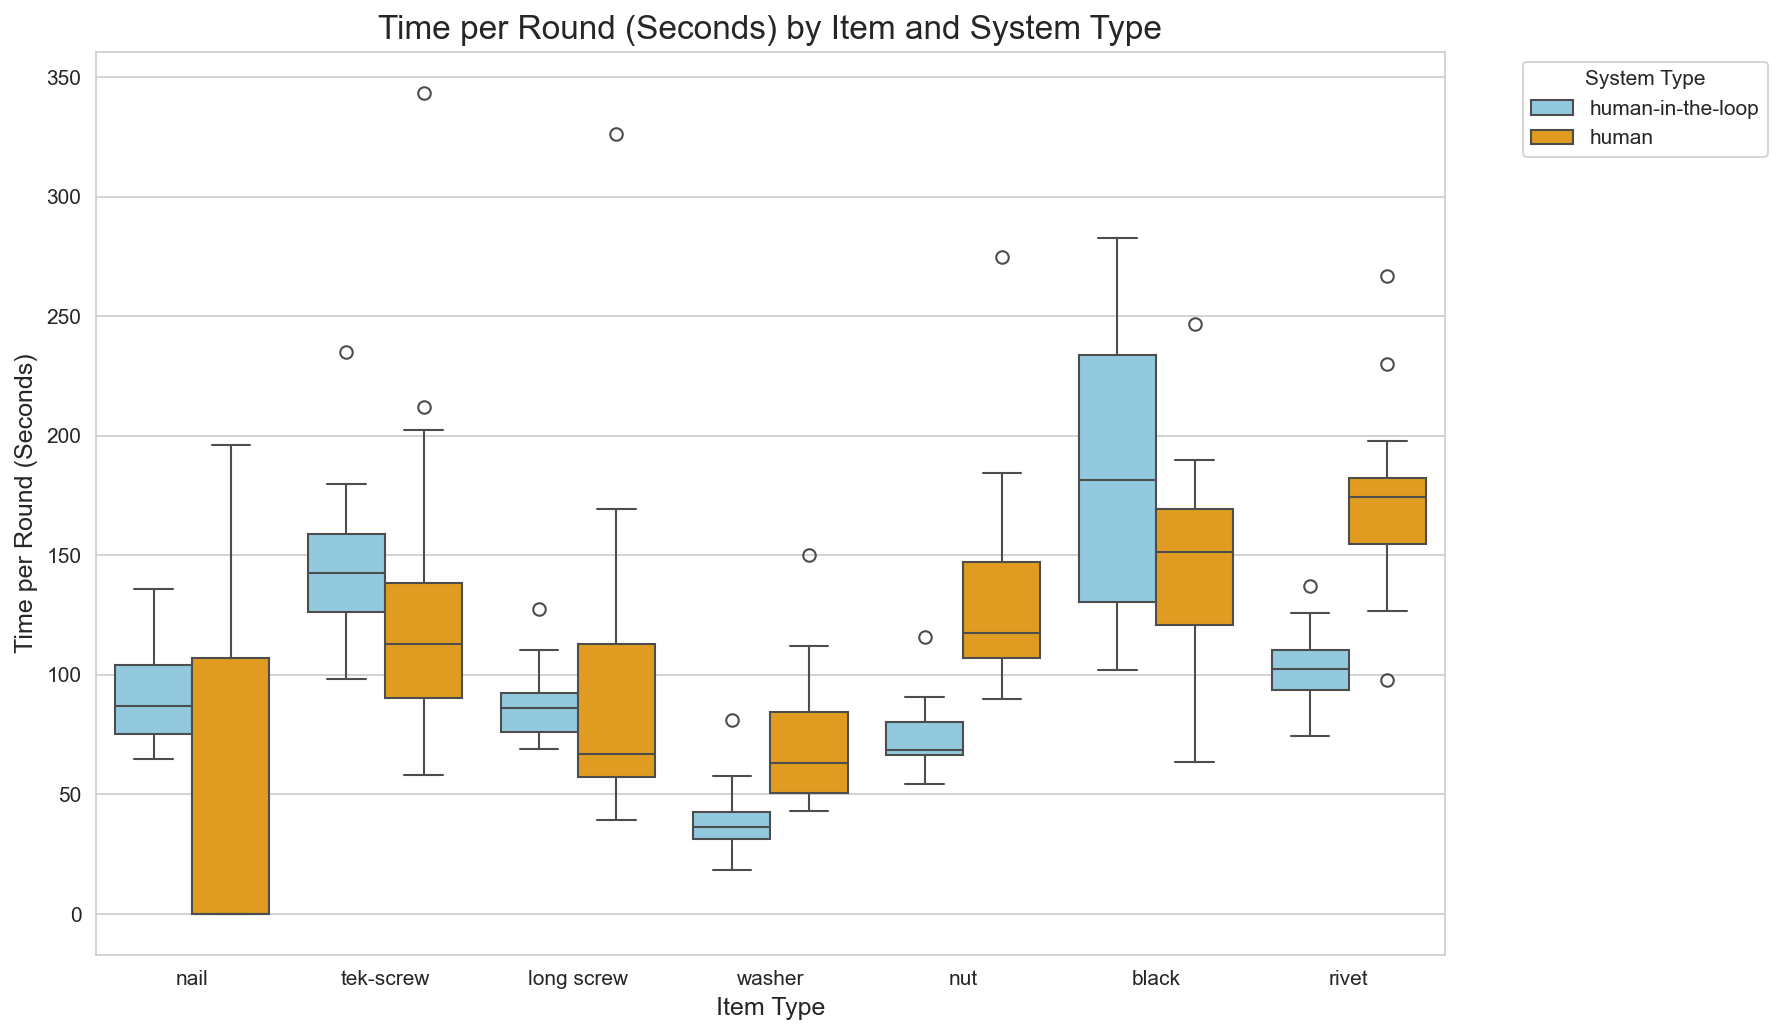

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set a consistent plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 150 # High resolution for better plot exports

# Time per Round
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='Item',
    y='Total_Seconds_Per_Round',
    hue='System_Type',
    palette={'human': 'orange', 'human-in-the-loop': 'skyblue'}
)

plt.title('Time per Round (Seconds) by Item and System Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Time per Round (Seconds)', fontsize=12)
plt.legend(title='System Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_filename = 'Total_Seconds_Per_Round_boxplot.png'
plt.savefig(plot_filename)
print(f"Saved {plot_filename}")
plt.show()

## Analysis of Summary Statistics: Human vs. Human-in-the-Loop Systems

This section presents a comparative analysis of performance metrics between a human-only inspection system and a human-in-the-loop (AI-assisted) system. The analysis is based on summary statistics derived from 20 rounds of experimentation for each of seven distinct hardware object types. Performance was evaluated across three primary dimensions: efficiency (time), accuracy, and defect detection rate.

### 1. Task Efficiency (Mean Completion Time)

Efficiency, measured by the mean time in seconds to complete a round, varied significantly depending on the object being inspected.

* **Human-in-the-Loop System Advantage:** The AI-assisted system demonstrated greater efficiency for four of the seven objects. The most substantial gains were observed with "rivet" (103.85s vs. 170.74s), "nut" (73.21s vs. 133.92s), and "washer" (38.68s vs. 72.13s).
* **Human System Advantage:** Conversely, the human-only system was faster for three objects: "black screw" (143.15s vs. 187.36s), "tek-screw" (130.63s vs. 144.77s), and "nail" (60.2s vs. 90.75s).

### 2. Task Accuracy (Mean Object Count Accuracy)

Accuracy was measured as the ratio of the observed object count to the true count. The data indicates a general trend where the human-only system maintained higher accuracy.

* The human-only system was more accurate for five of the seven object types: "black screw" (1.03 vs. 0.86), "long screw" (1.0 vs. 0.91), "rivet" (1.0 vs. 0.83), "tek-screw" (0.99 vs. 0.85), and "washer" (1.0 vs. 0.97).
* The human-in-the-loop system achieved higher accuracy on only two objects: "nail" (0.89 vs. 0.44) and "nut" (1.0 vs. 0.99).

### 3. Defect Detection

The mean number of observed defects provides a measure of quality inspection capability. The human-only system consistently outperformed or matched the AI-assisted system in this regard.

* **Human System Superiority:** The human inspector found a strictly higher mean number of defects in five categories: "tek-screw" (14.6 vs. 6.4), "rivet" (9.8 vs. 4.3), "long screw" (6.0 vs. 3.3), "black screw" (5.0 vs. 2.8), and "nail" (2.1 vs. 1.85).
* **Tied Performance:** For two objects, "nut" and "washer", both systems identified an identical mean number of defects (3.0 for each). Notably, in no instance did the human-in-the-loop system identify more defects than the human-only system.

### 4. Performance Consistency (Standard Deviation Analysis)

An analysis of the standard deviation reveals patterns in the consistency of each system.

* **Time Consistency:** The human-in-the-loop system exhibited lower variability in completion time for six of the seven objects. For example, with "long screw", the standard deviation for the AI-assisted system was 14.83 seconds, compared to 66.22 seconds for the human system. This suggests the AI assistance regularized the pace of the task.
* **Accuracy Consistency:** A blanket statement on accuracy consistency is not supported by the data. While the AI-assisted system showed higher variability in some cases (e.g., "black screw": 0.1 vs. 0.01), it demonstrated substantially lower variability in others. For the "nail", the AI-assisted system's accuracy was far more consistent (Std Dev 0.06) than the human's (Std Dev 0.5).

### 5. Synthesis and Interpretation

The data indicates that the utility of the human-in-the-loop system is highly context-dependent and reveals a potential trade-off between speed and quality. The system appears to provide the most significant efficiency benefits for tasks involving visually simple objects (e.g., washers, nuts), where it successfully reduces completion time without a critical loss of accuracy.

However, for more complex objects (e.g., black screws) or tasks requiring nuanced visual judgment (defect detection), the AI-assisted system often resulted in slower and less accurate performance. This suggests a hypothesis related to cognitive load: for simple tasks, the AI offloads cognitive effort, freeing up the human operator to work faster. For complex tasks, the process of supervising, interpreting, and potentially overriding the AI's outputs may impose additional cognitive load, thereby degrading overall performance. The consistent inability of the AI-assisted system to improve upon human defect detection further supports the notion that its utility is confined to simplistic, high-volume counting tasks rather than qualitative inspection.

Saved Accuracy_per_Round_boxplot.png


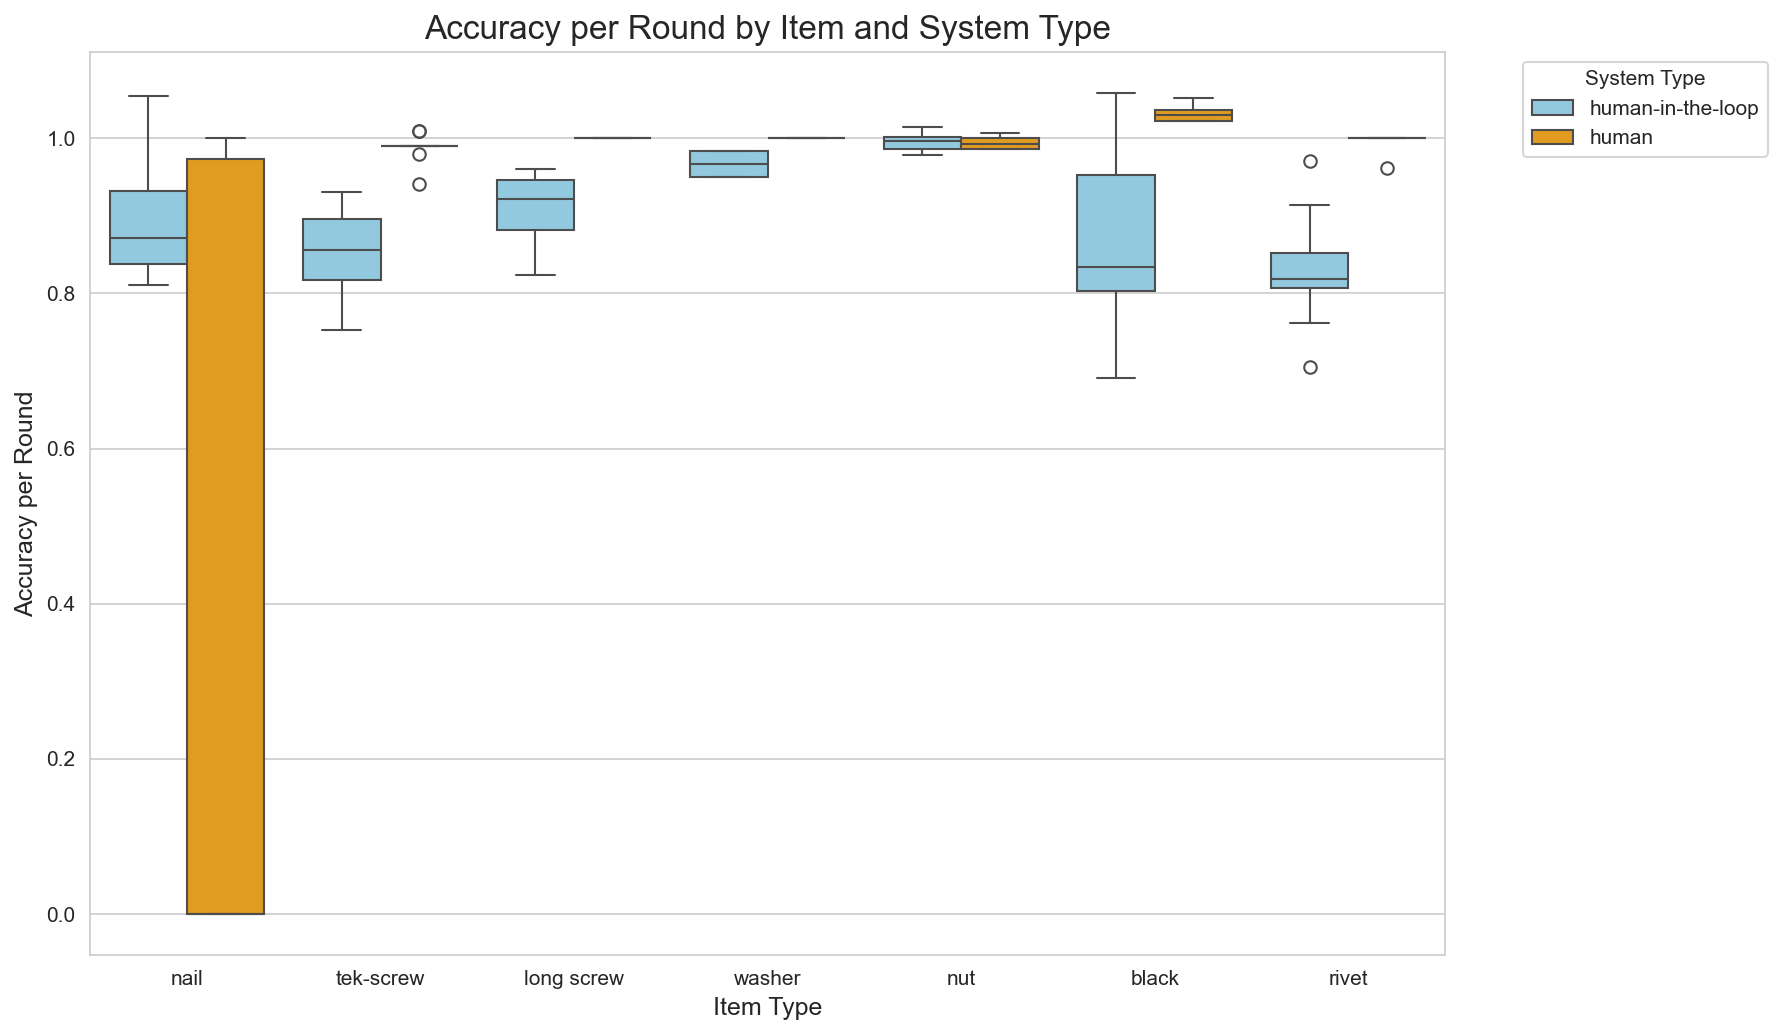

In [7]:
# Accuracy per Round
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=df,
    x='Item',
    y='Accuracy for Round',
    hue='System_Type',
    palette={'human': 'orange', 'human-in-the-loop': 'skyblue'}
)

plt.title('Accuracy per Round by Item and System Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Accuracy per Round', fontsize=12)
plt.legend(title='System Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plot_filename = 'Accuracy_per_Round_boxplot.png'
plt.savefig(plot_filename)
print(f"Saved {plot_filename}")
plt.show()

## Analysis of Task Accuracy

This section provides a granular analysis of the accuracy of the human-only and human-in-the-loop systems. Accuracy is defined as the mean ratio of the reported object count to the ground truth. The findings reveal distinct performance patterns and systematic biases contingent on the object type.

---

### 1. Comparative Accuracy by Item Type

A direct comparison of mean accuracy reveals a general performance advantage for the human-only system.

* **Human System Advantage**: The human-only system demonstrated superior or equal mean accuracy for six of the seven items. It achieved perfect (1.0) or above-perfect accuracy on four items ("black screw", "long screw", "rivet", "washer") and higher accuracy on a fifth ("tek-screw").
* **Human-in-the-Loop System Advantage**: The AI-assisted system achieved a substantially higher mean accuracy in only one instance: the "nail" (0.89 vs. 0.44). For the "nut," its performance was marginally better (1.0 vs. 0.99).
* **Clarification on "Washer" Performance**: For the "washer," the human system's mean accuracy was perfect (1.0), while the AI-assisted system's was lower (0.97). This constitutes a clear performance advantage for the human-only system.

---

### 2. Analysis of Performance Consistency

Examining the standard deviation of accuracy reveals crucial differences in the reliability of each system.

* **General Human Consistency**: For most items, the human-only system exhibited extremely low performance variability, with standard deviations at or near 0.01.
* **The "Nail" Anomaly**: The "nail" represents a significant exception. The human-only system's accuracy for nails was exceptionally volatile, with a standard deviation of 0.5. In stark contrast, the AI-assisted system produced a much more consistent result for the same object, with a standard deviation of only 0.06. This suggests the AI's primary contribution for this item was not just higher mean accuracy, but a significant reduction in performance variance.

---

### 3. Systematic Performance Biases

The data suggests that each system is prone to a different type of systematic counting error.

* **Human Tendency for Over-counting**: The human-only system displayed a tendency to over-count certain items, evidenced by a mean accuracy score of 1.03 for the "black screw".
* **AI Tendency for Under-counting**: The AI-assisted system's mean accuracy never exceeded 1.0 for any item. This suggests a potential systemic bias toward under-counting, where the system is more likely to miss an object than to count a single object multiple times.

---

### 4. Interpretation of the "Nail" Anomaly

The dramatic performance difference for the "nail" warrants special consideration. The AI-assisted system's clear superiority in this isolated case suggests that the performance variance is rooted in the specific morphology of the object. A plausible hypothesis is that the human visual system struggles with the **perceptual segmentation** of thin, dark, overlapping objects like nails when presented in a pile. The AI's underlying computer vision model, by operating on a pixel-analysis level, may be more effective at this specific segmentation task, thereby overcoming the human's perceptual limitations and resulting in a more accurate and consistent count.

Saved Defects_Observed_BarPlot.png


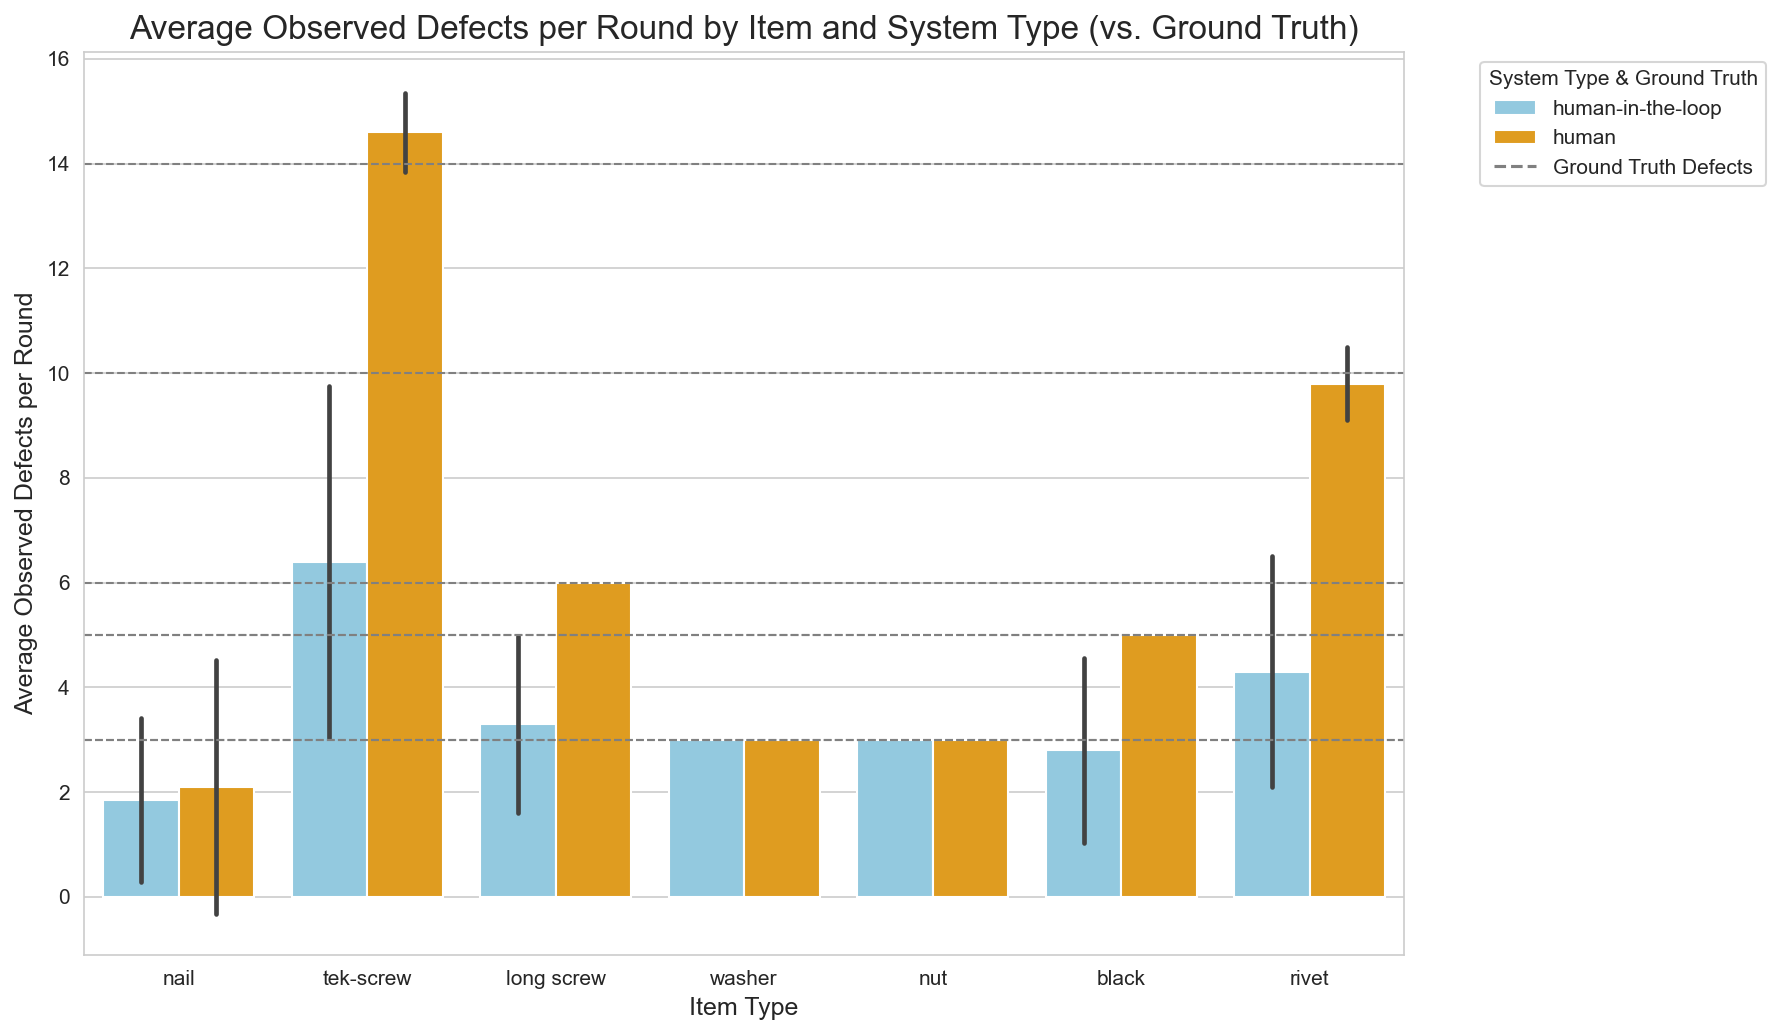

In [8]:
# Defects Observed
plt.figure(figsize=(12, 7))
sns.barplot(
    data=df,
    x='Item',
    y='Defects for Round',
    hue='System_Type',
    estimator=np.mean, # Show mean observed defects for each group
    errorbar='sd',     # Show standard deviation as error bars
    palette={'human': 'orange', 'human-in-the-loop': 'skyblue'}
)

# Add horizontal lines for Ground Truth Defects for each item
for item_name in df['Item'].unique():
    gt_defects = df[df['Item'] == item_name]['GT_Number_of_Defects'].iloc[0]
    plt.axhline(gt_defects, color='gray', linestyle='--', linewidth=1)

# --- Create a clean legend ---
# Get existing handles from the bar plot
handles, _ = plt.gca().get_legend_handles_labels()

# Create a proxy artist for the Ground Truth line for a clean legend entry
gt_handle = Line2D([0], [0], color='gray', linestyle='--', label='Ground Truth Defects')
handles.append(gt_handle)

plt.title('Average Observed Defects per Round by Item and System Type (vs. Ground Truth)', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average Observed Defects per Round', fontsize=12)

# Use the combined handles for the legend; matplotlib will get the labels from them
plt.legend(handles=handles, title='System Type & Ground Truth', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
defect_plot_filename = 'Defects_Observed_BarPlot.png'
plt.savefig(defect_plot_filename)
print(f"Saved {defect_plot_filename}")
plt.show()

## Analysis of Defect Detection Performance Against Ground Truth

This analysis evaluates the efficacy of both the human-only and human-in-the-loop systems in identifying manufacturing defects. Performance is measured by comparing the mean number of defects observed per round against a known ground truth value for each object type.

---

### 1. Human Operator Performance

The human-only system demonstrated a high degree of accuracy in detecting defects for the majority of object types.

* **High Accuracy Cases**: For items such as the "tek-screw," "long screw," and "black screw," the mean number of defects detected by the human operator was nearly identical to the ground truth (e.g., 14.6 observed vs. 14 ground truth for tek-screws).
* **Significant Performance Gap**: A notable exception was the "nail." For this item, the human operator detected a mean of only 2.1 defects, falling significantly short of the ground truth of 5. This represents a detection rate of just 42% for this specific item.

---

### 2. AI-Assisted System Performance

The AI-assisted system exhibited a consistent and significant pattern of under-detection across nearly all categories.

* **Systematic Under-detection**: For items with non-trivial defects, the system consistently failed to identify a large percentage of the known defects. For example, it detected only 6.4 of 14 tek-screw defects (46%) and 4.3 of 10 rivet defects (43%).
* **Cases of Full Detection**: The system was only able to match the ground truth on items with the simplest defect profiles ("washer" and "nut"), where the ground truth was 3 defects.
* **Critical Failure Case**: Similar to the human operator, the AI-assisted system performed very poorly on the "nail," identifying a mean of only 1.85 out of 5 defects (a 37% detection rate).

---

### 3. Comparative Analysis and Quality Control Implications

While the human operator was demonstrably superior to the AI-assisted system, the findings challenge the notion that the human system is universally reliable.

* **Superiority of Human Inspection**: The human operator outperformed the AI-assisted system in five of the seven categories and never performed worse. The AI-assisted system's broad and severe under-performance (missing 40-60% of defects in most cases) renders it unsuitable for quality-critical applications.
* **Human Reliability Gaps**: The human operator's significant failure to detect defects on "nails" indicates that human reliability is also context-dependent. A conclusion that human inspection is infallible would be an overstatement; rather, it possesses specific, and potentially critical, reliability gaps.

---

### 4. Interpretation: The Role of Defect Subtlety

The poor performance of *both* systems on the "nail" suggests that a key variable influencing performance is the **subtlety of the defect itself**. While both systems could successfully identify all defects on washers and nuts, they both failed significantly on nails. This suggests that the type of defect present on the nails may have been inherently more difficult to perceive for both the human eye and the AI's vision model. Therefore, the overall effectiveness of a quality control system appears to be a function not only of the inspector (human or AI) but also of the nature and subtlety of the defects being sought.

## **5. Statistical Significance Testing**

In [9]:
# Independent Samples T-Tests

def cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    s1, s2 = np.std(group1, ddof=1), np.std(group2, ddof=1) # ddof=1 for sample standard deviation
    s_pooled = np.sqrt(((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2))
    d = (np.mean(group1) - np.mean(group2)) / s_pooled
    return d

# Store results
test_results = []

# Define metrics to test
metrics_to_test = {
    'Total_Seconds_Per_Round': 'Efficiency (Time)',
    'Accuracy for Round': 'Accuracy (Object Count)',
    'Defects for Round': 'Defect Count' # Note: GT defects are per item, this is observed count
}

for item in df['Item'].unique():
    # Filter data for the current item
    item_df = df[df['Item'] == item]

    # Check if both system types exist for the item
    human_data = item_df[item_df['System_Type'] == 'human']
    hitl_data = item_df[item_df['System_Type'] == 'human-in-the-loop']

    # Proceed only if both groups have data for the current item
    if not human_data.empty and not hitl_data.empty:
        for metric, metric_display_name in metrics_to_test.items():
            group_human = human_data[metric].dropna()
            group_hitl = hitl_data[metric].dropna()

            # Ensure there's enough data for the t-test (at least 2 samples per group)
            if len(group_human) > 1 and len(group_hitl) > 1:
                # Perform independent samples t-test
                # Assuming unequal variances (Welch's t-test) is often safer if unsure
                t_stat, p_value = stats.ttest_ind(group_human, group_hitl, equal_var=False)
                
                # Calculate Cohen's d
                d_value = cohens_d(group_human, group_hitl)

                # Determine significance
                significance = "Significant (p < 0.05)" if p_value < 0.05 else "Not Significant (p >= 0.05)"

                test_results.append({
                    'Item': item,
                    'Metric': metric_display_name,
                    'Human_Mean': group_human.mean().round(2),
                    'HITL_Mean': group_hitl.mean().round(2),
                    'T_Statistic': round(t_stat, 2),
                    'P_Value': f"{p_value:.3f}", # Format p-value for readability
                    'Significance': significance,
                    'Cohens_d': round(d_value, 2)
                })
            else:
                test_results.append({
                    'Item': item,
                    'Metric': metric_display_name,
                    'Human_Mean': np.nan, 'HITL_Mean': np.nan,
                    'T_Statistic': np.nan, 'P_Value': "N/A",
                    'Significance': "Insufficient Data",
                    'Cohens_d': np.nan
                })
    else:
        # Handle cases where one system type might be missing (e.g., washer AI data)
        for metric, metric_display_name in metrics_to_test.items():
             test_results.append({
                'Item': item,
                'Metric': metric_display_name,
                'Human_Mean': human_data[metric].mean().round(2) if not human_data.empty else np.nan,
                'HITL_Mean': hitl_data[metric].mean().round(2) if not hitl_data.empty else np.nan,
                'T_Statistic': "N/A", 'P_Value': "N/A",
                'Significance': "One System Type Missing",
                'Cohens_d': np.nan
            })
             
results_df = pd.DataFrame(test_results)
print("\n--- Statistical Test Results ---")
print(results_df)

results_df.to_csv('statistical_test_results.csv', index=False)
print("\nStatistical test results saved to 'statistical_test_results.csv'")


--- Statistical Test Results ---
          Item                   Metric  Human_Mean  HITL_Mean  T_Statistic  \
0         nail        Efficiency (Time)       60.20      90.75        -1.78   
1         nail  Accuracy (Object Count)        0.44       0.89        -4.01   
2         nail             Defect Count        2.10       1.85         0.39   
3    tek-screw        Efficiency (Time)      130.63     144.77        -0.86   
4    tek-screw  Accuracy (Object Count)        0.99       0.85        11.18   
5    tek-screw             Defect Count       14.60       6.40        10.64   
6   long screw        Efficiency (Time)       93.06      87.06         0.40   
7   long screw  Accuracy (Object Count)        1.00       0.91         9.73   
8   long screw             Defect Count        6.00       3.30         7.15   
9       washer        Efficiency (Time)       72.13      38.68         4.74   
10      washer  Accuracy (Object Count)        1.00       0.96        11.03   
11      washer    

e:\Documents\GitHub\mldetection_data_analysis\.venv\Lib\site-packages\scipy\stats\_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
C:\Users\erwin\AppData\Local\Temp\ipykernel_10648\2348176483.py:7: RuntimeWarning: invalid value encountered in scalar divide
  d = (np.mean(group1) - np.mean(group2)) / s_pooled


## Interpretation of Statistical Significance Testing

To validate the findings from the descriptive summary, a series of independent t-tests were conducted. This statistical analysis serves to determine whether the observed differences in performance between the human-only and human-in-the-loop systems are statistically significant or likely due to random chance. The results, including p-values and Cohen's d for effect size, are interpreted below.

---

### 1. Statistically Significant Findings

The analysis reveals that the majority of the observed performance differences are statistically significant, with p-values well below the conventional alpha level of 0.05.

* **Task Accuracy**: The human-only system's superior accuracy was statistically significant for five key items: "tek-screw," "long screw," "washer," "black screw," and "rivet". The AI-assisted system's superior accuracy for the "nail" was also statistically significant. The large to huge effect sizes (Cohen's d ranging from 1.27 to 4.25) indicate that these differences are not only statistically significant but also substantial in practical terms.
* **Task Efficiency (Time)**: Significant differences in completion time were found for four items. The AI-assisted system was significantly faster on the "washer," "nut," and "rivet," while the human-only system was significantly faster on the "black screw". Again, large effect sizes confirm the practical importance of these findings.
* **Defect Detection**: The human operator's superior ability to detect defects was statistically significant for the "tek-screw," "long screw," "black screw," and "rivet," with all p-values being less than 0.001.

---

### 2. Analysis of Non-Significant Findings

The cases where statistical significance was not found are equally instructive, as they provide crucial context and refine the overall conclusions.

* **Non-Significant Time Differences**: For three items ("nail," "tek-screw," and "long screw"), the difference in mean completion time was not statistically significant. This is likely attributable to high performance variance within one or both groups, which makes it impossible to conclude that the observed small difference in means represents a true effect.
* **Non-Significant Accuracy Difference ("Nut")**: The lack of a significant difference in accuracy for the "nut" is expected, as the mean scores (0.99 for human vs. 1.0 for AI) were already nearly identical.
* **Crucial Finding on "Nail" Defect Detection**: The most consequential non-significant result is for "nail" defect detection. Despite the human operator observing a slightly higher mean number of defects (2.1 vs. 1.85), the p-value of 0.701 is exceptionally high. This indicates that there is **no statistically significant difference** between the two systems for this specific task.

---

### 3. Synthesis and Revised Conclusions

The statistical tests largely validate the initial descriptive analysis, confirming that the substantial performance gaps between the two systems are real effects. The use of a human-in-the-loop system introduced significant, measurable changes in performance across accuracy, efficiency, and defect detection.

However, the statistical results necessitate a critical revision to the conclusion regarding "nail" defect detection. The initial observation of a slight human advantage is not supported by statistical evidence. Therefore, the refined conclusion is that while the human operator is demonstrably superior for most defect detection tasks, both systems performed equally poorly on the "nail," with no statistically significant difference between them. This highlights the importance of statistical validation to prevent misinterpretation of small differences that are likely attributable to random sampling variability.